In [4]:
def Notebook():
    print("Tesla Stock Predition")
    Notebook()

Ini adalah latihan saya dalam mempelajari data science. kali ini saya akan membuat sebuah mini project mengenai (TESLA STOCK PRICE PREDICTION). 

Dalam Project ini terdapat 5 kerangka besar

1. Bussines Problem
   data ini memiliki rentetan data history tang terjadi sebelumnya. data ini berupa:

   Date : mewakili tanggal hari transaksi

   Open : merupakan harga saham awal pada hari atau tanggal tersebut

   High : merupakan pergerakan harga tertinggi yang terjadi pada hari atau tanggal tersebut

   Low  : merupakan pergerakan harga terendah yang terjadi pada hari atau tanggal tersebut

   Close : merupakan harga penutupan pada hari atau tanggal tersebut
   Volume : merupakan informasi value transaksi untuk perdagangan yang relevan.

2. Understanding Data

In [1]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [33]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


MinMaxScaler dalam library scikit-learn adalah alat yang digunan untuk penskalaan fitur, yang akan mengubah setiap fitur sehingga nilainya berada dalam rentan tertentu. biasanya digunakan untuk menormalisasikan fitur iput dar data sebelum memasukan ke dalam mdel pembelajaran mesin (machine learning


mean_squared_error adalah metrik evaluasi yang digunakan untuk mengukur seberapa baik model regresi memprediksi nilai yang kontinue. mengukur rata rata kuadrat dari selisih antara nilai sebenarnya dan nilai yang dipredisksi oleh model


In [3]:
import warnings
warnings.filterwarnings('ignore')

warnings.filterwarnings('ignore') digunakan untuk mengabaikan semua pesan peringatan yang dihasilkan selama eksekusi kode. Ini sering digunakan jika Anda ingin menyembunyikan pesan peringatan yang tidak relevan atau mengganggu selama proses eksekusi.

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

tensorflow sebuah paltform open source yang digunakan untuk pembelajaran mesin dan pengembangan model kecerdasan buatan berikut adalah penjelesan singkat dari beberapa komponenen yang digunakan:

1. Sequentials meruapakan sebuah model keras yang memungkina kita untuk membuaat model secara berurutan, artinya kita dapat menambahkan lapisan secara berurutan satu per satu.

2. Dense merupakan lapisan neural network yang paling sering digunakan, lapisan ini terdiri dari neuron yang terhubunh sepenuhnya satu sama lain.

3. LSTM (Long Short - Term Memory)merupakan lapisan jaringan saraf rekursif (RNN) yang berguna untuk menangani data berurutan.

4. Dropout merupkan teknik regularisasi yang digunakan untuk mencegah overfitting dalam model.

5. ModelCheckpoint: Ini adalah callback keras yang digunakan untuk menyimpan model selama proses pelatihan. Ini memungkinkan kita untuk menyimpan model terbaik berdasarkan metrik yang ditentukan, seperti akurasi atau kehilangan.

6. EarlyStopping: Ini adalah callback keras yang digunakan untuk menghentikan pelatihan model jika tidak terjadi peningkatan dalam metrik yang ditentukan (misalnya, kehilangan validasi) dalam jumlah epoch yang ditentukan. Ini membantu mencegah overfitting dan menghemat waktu pelatihan.

In [5]:
data = pd.read_csv('TSLA.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-05-12,176.070007,177.380005,167.229996,167.979996,167.979996,157577100
1,2023-05-15,167.660004,169.759995,164.550003,166.350006,166.350006,105592500
2,2023-05-16,165.649994,169.520004,164.350006,166.520004,166.520004,98288800
3,2023-05-17,168.410004,174.500000,167.190002,173.860001,173.860001,125473600
4,2023-05-18,174.220001,177.059998,172.449997,176.889999,176.889999,109520300


In [6]:
def check_df(dataframe,head=5):
    print("#################### Shape #################### ")
    print(dataframe.shape)
    print("#################### Types #################### ")
    print(dataframe.dtypes)
    print("#################### Head #################### ")
    print(dataframe.head(head))
    print("#################### Tail #################### ")
    print(dataframe.dtypes)
    print("#################### NA #################### ")
    print(dataframe.isnull().sum())
    print("#################### Quantiles #################### ")
    #hanya menghitung kuantil untuk kolom numerik
    numeric_df = dataframe.select_dtypes(include='number')
    print(numeric_df.quantile([0,0.5,0.50,0.95,0.99,1]).T)

(numeric_df) dibuat untuk kolom dataframe yang tidak mendukung peritungan kuantil (misal kolom non numerik) maka dari itu perlu untuk membuat variabel tersebut jika langsung dioperasikan itu akan terjadi eror yang menyebakan tidak munculnya bilangan kauantil yang kita maksud.

berikut contoh kode program yang langsung mengeksekusi yang menyebakan terjadinya eror
{ print(dataframe.quantile([0,0.5,0.50,0.95,0.99,1]).T)}

In [7]:
check_df(data)

#################### Shape #################### 
(251, 7)
#################### Types #################### 
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object
#################### Head #################### 
         Date        Open        High         Low       Close   Adj Close  \
0  2023-05-12  176.070007  177.380005  167.229996  167.979996  167.979996   
1  2023-05-15  167.660004  169.759995  164.550003  166.350006  166.350006   
2  2023-05-16  165.649994  169.520004  164.350006  166.520004  166.520004   
3  2023-05-17  168.410004  174.500000  167.190002  173.860001  173.860001   
4  2023-05-18  174.220001  177.059998  172.449997  176.889999  176.889999   

      Volume  
0  157577100  
1  105592500  
2   98288800  
3  125473600  
4  109520300  
#################### Tail #################### 
Date          object
Open         float64
High         float64
Low          float64

In [8]:
data["Date"]=pd.to_datetime(data["Date"])
#df["Date"] = pd.to_datetime(df["Date"])

perintah diatas digunakan untuk mengkonversi "Date" ke dalam DataFrame menjadi tipe data datetime. 


In [9]:
check_df(data)

#################### Shape #################### 
(251, 7)
#################### Types #################### 
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object
#################### Head #################### 
        Date        Open        High         Low       Close   Adj Close  \
0 2023-05-12  176.070007  177.380005  167.229996  167.979996  167.979996   
1 2023-05-15  167.660004  169.759995  164.550003  166.350006  166.350006   
2 2023-05-16  165.649994  169.520004  164.350006  166.520004  166.520004   
3 2023-05-17  168.410004  174.500000  167.190002  173.860001  173.860001   
4 2023-05-18  174.220001  177.059998  172.449997  176.889999  176.889999   

      Volume  
0  157577100  
1  105592500  
2   98288800  
3  125473600  
4  109520300  
#################### Tail #################### 
Date         datetime64[ns]
Open        

In [10]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-05-12,176.070007,177.380005,167.229996,167.979996,167.979996,157577100
1,2023-05-15,167.660004,169.759995,164.550003,166.350006,166.350006,105592500
2,2023-05-16,165.649994,169.520004,164.350006,166.520004,166.520004,98288800
3,2023-05-17,168.410004,174.500000,167.190002,173.860001,173.860001,125473600
4,2023-05-18,174.220001,177.059998,172.449997,176.889999,176.889999,109520300


3. PREPARING THE DATA

In [11]:
tesla_data=data[["Date","Close"]]

variabel tesla_data digunakan untuk DataFrame baru yang hanya berisi informasi tanggal dan harga penutupan saja.

In [12]:
tesla_data.head()

,Date,Close
0,2023-05-12,167.979996
1,2023-05-15,166.350006
2,2023-05-16,166.520004
3,2023-05-17,173.860001
4,2023-05-18,176.889999


In [13]:
print("Min. Tarih:",tesla_data["Date"].min())
print("Max. Tarih:",tesla_data["Date"].max())

Min. Tarih: 2023-05-12 00:00:00
Max. Tarih: 2024-05-10 00:00:00


digunakan untuk menampilkan atau mencetak tanggal minimum dan maksimum menggunakan metode Min () dan Max () . dengan kode ditas kita dengan mudah mengetahui rentan waktu dari data harga penutupan data saham Tesla dalam DataFrame.

In [14]:
tesla_data.index=tesla_data["Date"]

In [15]:
tesla_data

,Date,Close
Date,,
2023-05-12,2023-05-12,167.979996
2023-05-15,2023-05-15,166.350006
2023-05-16,2023-05-16,166.520004
2023-05-17,2023-05-17,173.860001
2023-05-18,2023-05-18,176.889999
...,...,...
2024-05-06,2024-05-06,184.759995
2024-05-07,2024-05-07,177.809998
2024-05-08,2024-05-08,174.720001


In [16]:
result_data=tesla_data.copy()

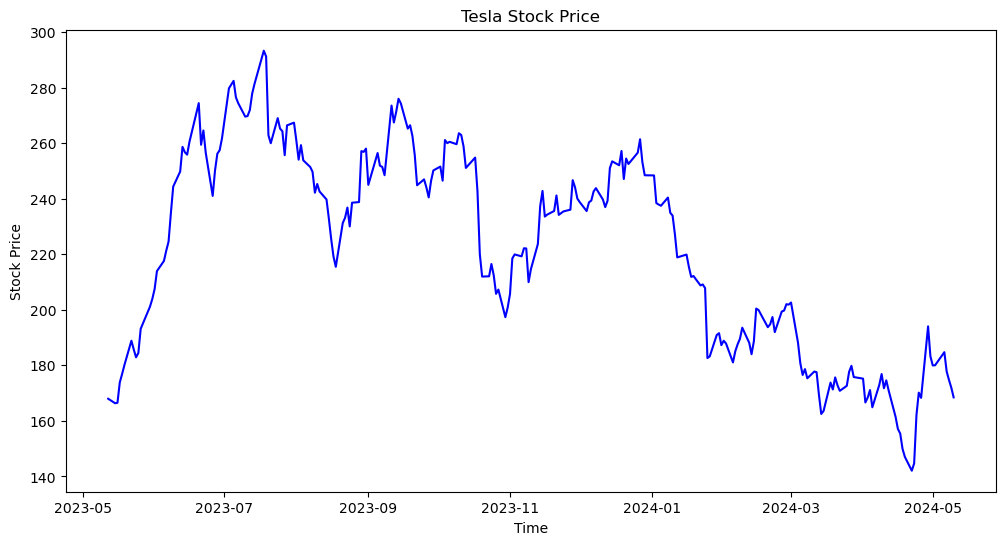

In [17]:
plt.figure(figsize=(12,6))
plt.plot(tesla_data["Close"],color="blue");
plt.ylabel("Stock Price")
plt.title("Tesla Stock Price")
plt.xlabel("Time")
plt.show()

In [18]:
tesla_data = tesla_data.values

In [19]:
tesla_data[0:5]

array([[Timestamp('2023-05-12 00:00:00'), 167.979996],
       [Timestamp('2023-05-15 00:00:00'), 166.350006],
       [Timestamp('2023-05-16 00:00:00'), 166.520004],
       [Timestamp('2023-05-17 00:00:00'), 173.860001],
       [Timestamp('2023-05-18 00:00:00'), 176.889999]], dtype=object)

In [20]:
def split_data(dataframe,test_size):
    pos=int(round(len(dataframe)*(1-test_size)))
    train=dataframe[:pos]
    test=dataframe[pos:]
    return train,test,pos

In [21]:
def split_data(dataframe,test_size):
    pos=int(round(len(dataframe)*(1-test_size)))
    train=dataframe[:pos]
    test=dataframe[pos:]
    return train,test,pos

In [22]:
train,test,pos=split_data(tesla_data,0.20)

In [23]:
print(train.shape, test.shape)

(201, 2) (50, 2)


In [24]:
scaler_train=MinMaxScaler(feature_range=(0,1))

In [28]:
columns_to_scale = ["Open","High","Low","Close","Volume"]
train = data[columns_to_scale]

In [42]:
print(type(train))
print(train.dtypes)

<class 'pandas.core.frame.DataFrame'>
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object


In [46]:
# Menggunakan StandardScaler untuk normalisasi
scaler_train = StandardScaler()
train_scaled = scaler_train.fit_transform(train)


In [47]:
# Mengonversi kembali array yang sudah dinormalisasi ke DataFrame
train_scaled_df = pd.DataFrame(train_scaled, columns=columns_to_scale)

# Mencetak hasil normalisasi
print(train_scaled_df.head())

       Open      High       Low     Close    Volume
0 -1.256870 -1.321793 -1.405831 -1.482721  1.471501
1 -1.488176 -1.528976 -1.480745 -1.527595 -0.416694
2 -1.543459 -1.535501 -1.486335 -1.522915 -0.681981
3 -1.467549 -1.400098 -1.406949 -1.320844  0.305431
4 -1.307752 -1.330493 -1.259916 -1.237428 -0.274028


In [57]:
scaler_test=MinMaxScaler(feature_range=(0,1))

In [62]:
train=scaler_train.fit_transform(train)

In [63]:
train[0:5]

array([[-1.25687046, -1.32179252, -1.40583082, -1.48272124,  1.47150118],
       [-1.48817641, -1.52897602, -1.48074465, -1.52759501, -0.41669444],
       [-1.54345906, -1.53550123, -1.48633516, -1.52291495, -0.68198098],
       [-1.46754866, -1.40009813, -1.40694877, -1.32084419,  0.30543107],
       [-1.30775241, -1.33049332, -1.25991616, -1.23742808, -0.27402806]])

In [64]:
test[0:5]

array([[Timestamp('2024-03-01 00:00:00'), 202.639999],
       [Timestamp('2024-03-04 00:00:00'), 188.139999],
       [Timestamp('2024-03-05 00:00:00'), 180.740005],
       [Timestamp('2024-03-06 00:00:00'), 176.539993],
       [Timestamp('2024-03-07 00:00:00'), 178.649994]], dtype=object)

NameError: name 'create_features' is not defined

In [70]:
X_train,y_train=create_features(train,lookback)


NameError: name 'create_features' is not defined